In [21]:
from facetorch import FaceAnalyzer
from facetorch.analyzer.utilizer import LandmarkDrawerTorch
from omegaconf import OmegaConf
from torch.nn.functional import cosine_similarity
from typing import Dict

import matplotlib.pyplot as plt
import operator
import torchvision
import os
import shutil
import torch
import pandas as pd

## Curating First Dataset (LFW)

In [22]:
DATASET_PATH = '../Dataset/Labeled_Faces_in_the_Wild/lfw-deepfunneled/lfw-deepfunneled/'
NEW_PATH = './Curated_Dataset/'
if os.path.exists(NEW_PATH):
    shutil.rmtree(NEW_PATH)
os.makedirs(NEW_PATH)

In [ ]:
thresholdImages = 10

curatedDatasetSizes = pd.DataFrame(columns=["Amount of Images"])

for name in os.listdir(DATASET_PATH):
    temp_path = DATASET_PATH + f'{name}'
    if len(os.listdir(temp_path)) >= thresholdImages:
        temp_new_path = NEW_PATH + f'{name}'
        if os.path.exists(temp_new_path):
            shutil.rmtree(temp_new_path)
        shutil.copytree(temp_path, temp_new_path)
        addDataframeRow = pd.DataFrame({"Amount of Images": [len(os.listdir(temp_new_path))]})
        curatedDatasetSizes = pd.concat([curatedDatasetSizes, addDataframeRow], ignore_index=True)


Plotting the amount of images per person in the Dataset

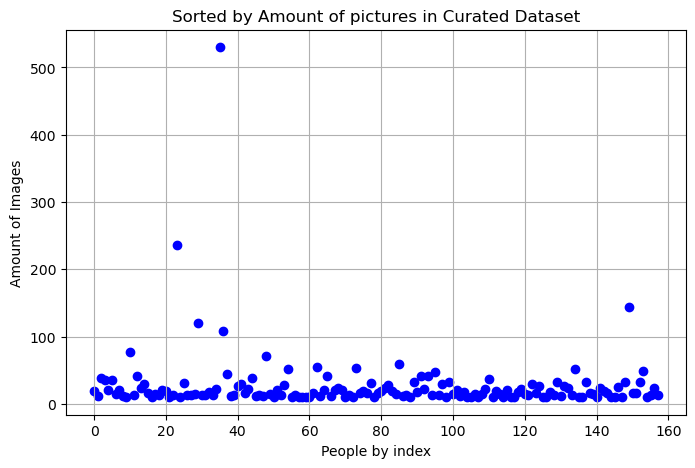

In [43]:
# curatedDatasetSizes = curatedDatasetSizes.sort_values(by='Amount of Images', ascending=False)
plt.figure(figsize=(8, 5))
plt.scatter(x=curatedDatasetSizes.index, y=curatedDatasetSizes['Amount of Images'], marker='o', color='b')
plt.title("Sorted by Amount of pictures in Curated Dataset")
plt.xlabel("People by index")
plt.ylabel("Amount of Images")
plt.grid()
plt.show()